Load and Explore the Dataset

In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [50]:
df = load_breast_cancer()

Split the Data

In [52]:
X = df['data']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



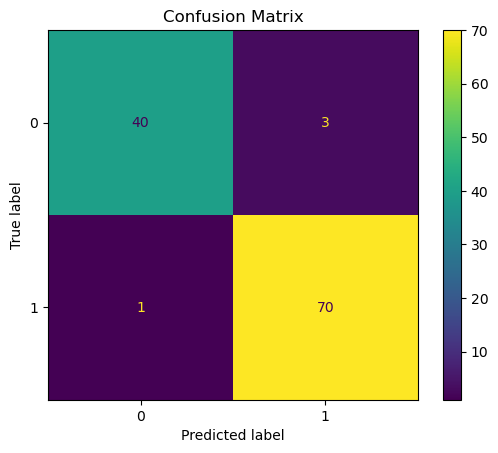

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()


# experimenting with other classifiers

In [55]:
from sklearn.svm import SVC


model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [56]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



# Hyperparameter Tuning with GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

grid_search.fit(X_train, y_train)


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9626373626373625
Accuracy: 0.96


# Cross-Validation with KFold

In [58]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100, random_state=42)


cv_scores = cross_val_score(model, X, y, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Mean CV Score: 0.96


# Confusion Matrix with RandomForest

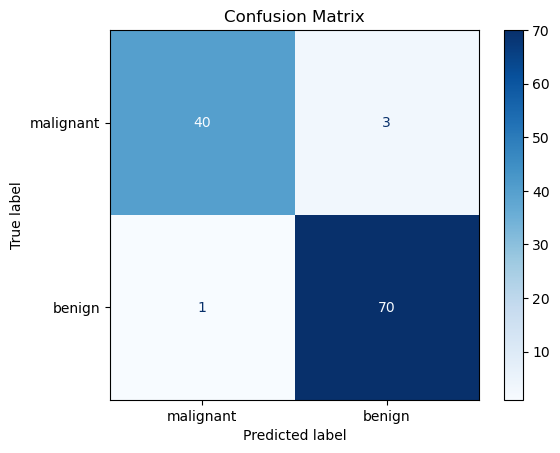

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Comparing Multiple Classifiers

In [61]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")


Random Forest Accuracy: 0.96
SVM Accuracy: 0.96
KNN Accuracy: 0.96
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samp

[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth